## IMPLEMENTATION OF RL FOR MULTI-ARMED BANDIT PROBLEM

## Importing libraries

In [ ]:
import matplotlib
import seaborn as sns
from itertools import count
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Q1 : 12-armed testbed : naïve approach

In [ ]:

bandit_number = 12
mean_rewards = np.random.normal(size=bandit_number)

#reward function
def reward_fn(bandit,  mean_rewards, t=None):
    if bandit >=0 and bandit <=bandit_number:
        return np.random.normal(loc=mean_rewards[bandit], scale=1)
    else:
        raise ValueError('bandit >=0 and <{}'.format(bandit_number))


#sample rewards of k-armed test bed
sample_size_reward = 10
p_rewards = []
for a in range(bandit_number):
    p_rewards += [(reward_fn(a, mean_rewards),a) for _
                             in range(sample_size_reward)]
sample_R = pd.DataFrame(p_rewards,
                              columns = ['REWARD', 'BANDIT'])

sample_R

,REWARD,BANDIT
0,-0.105450,0
1,1.151070,0
2,2.779800,0
3,-0.137043,0
4,0.665457,0
...,...,...
115,0.185880,11
116,-0.736683,11
117,2.792625,11
118,1.086572,11


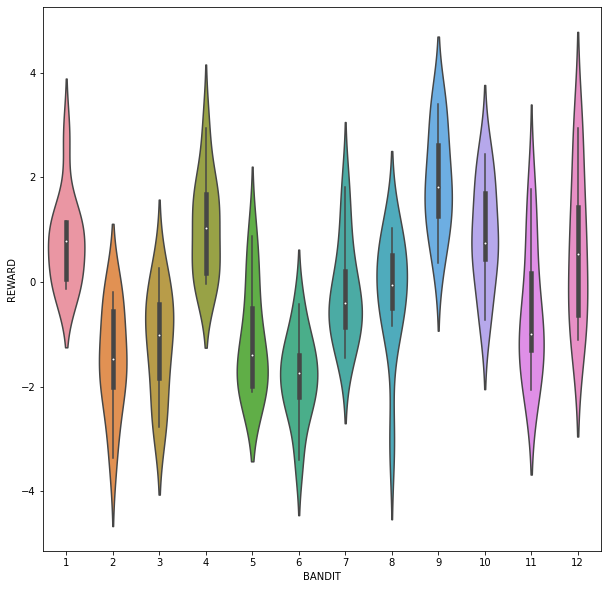

In [ ]:
#PLOTTING
plt.figure(figsize=(10,10))
ax = sns.violinplot(x=sample_R["BANDIT"]+1, y=sample_R["REWARD"])

 Inference:. Mean reward for Bandit 12 is high as bandit 12 has the maximum upper bound

## Q2: Vary the value of 𝜀 with 𝜀 = 0.2 and 𝜀 = 0.1 and implement 𝜀-greedy approach

In [ ]:
class SationaryMABEnv:

    def __init__(self, bandit_number=12, max_tsteps=1000):
        self.bandit_number = bandit_number
        self.T = max_tsteps
        self.mean_rewards = self.bandid_means_create()

    def bandid_means_create(self):
        return np.random.normal(size=self.bandit_number)
    def reset(self):
        self.mean_rewards = self.bandid_means_create()

    def get_reward(self, bandit, t=None):
        if bandit >=0 and bandit <=self.bandit_number:
            return np.random.normal(loc=self.mean_rewards[bandit], scale=1)
        else:
            raise ValueError('argument bandit must be integer >=0 and <={}'.format(self.bandit_number))


def greedy_run_eps(env, eps = 0.01, gamma=0.0):

    N = np.zeros(env.bandit_number, dtype=np.int32)
    reward_estimates_q = np.zeros(env.bandit_number)
    reward_history = np.zeros(env.T)

    for itrn in range(env.T):
        #exploring
        bandit_chosen = np.random.randint(env.bandit_number)
        if np.random.uniform() > eps:
            #greedy
            bandit_chosen = np.argmax(reward_estimates_q)
        reward = env.get_reward(bandit_chosen, itrn)
        N[bandit_chosen] +=1
        stepsize = 1/N[bandit_chosen]
        if gamma != 0:
            stepsize = gamma
        reward_estimates_q[bandit_chosen] = reward_estimates_q[bandit_chosen] + \
                                    stepsize * (reward - reward_estimates_q[bandit_chosen])
        reward_history[itrn] = reward
    return reward_history

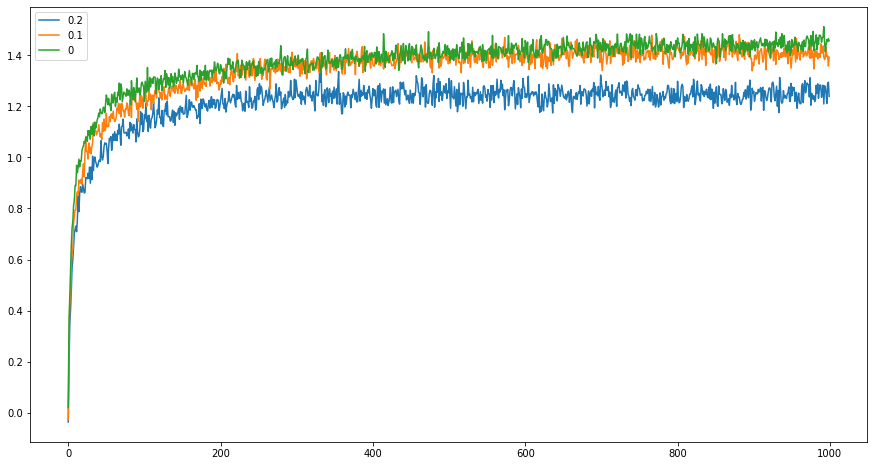

In [ ]:
envi = SationaryMABEnv()

iter = 1000
expir = 2000
reward_averages_by_eps = []

for eps in [0.2, 0.1,0]:
    reward_histories = np.zeros(iter)
    for exp_number in range(expir):
        envi.reset()
        history = greedy_run_eps(envi, eps, gamma=0.2)
        reward_histories = np.add(history,reward_histories )
    reward_averages_by_eps.append(reward_histories/expir)

  #Plot average reward accross 2k experiments
plt.figure(figsize=(15,8))
for i, eps in enumerate([0.2, 0.1,0]):
    plt.plot(reward_averages_by_eps[i], label=str(eps))
plt.legend()

for, 𝜀 = 0.2 we get minimum  rewards and for  𝜀 = 0 we get maximum  rewards

## Q3: Analyze the effect of initial values with Q1 = 0 and Q1 = 3, Q1 = 5.

In [ ]:
class SationaryMABEnv:

    def __init__(self, num_bandits=12, max_time_steps=1000):
        self.num_bandits = num_bandits
        self.T = max_time_steps
        self.mean_rewards = self.bandid_means_create()

    def bandid_means_create(self):
        return np.random.normal(size=self.num_bandits)
    def reset(self):
        self.mean_rewards = self.bandid_means_create()

    def get_reward(self, bandit, t=None):
        if bandit >=0 and bandit <=self.num_bandits:
            return np.random.normal(loc=self.mean_rewards[bandit], scale=1)
        else:
            raise ValueError('argument bandit must be integer >=0 and <={}'.format(self.num_bandits))


def greedy_run_eps(environment, eps = 0.01, gamma=0.0, initial=0):

    N = np.zeros(environment.num_bandits, dtype=np.int32)
    N[N == 0] = initial
    reward_estimates_q = np.zeros(environment.num_bandits)
    reward_history = np.zeros(environment.T)

    for itrn in range(environment.T):
        #exploring
        bandit_chosen = np.random.randint(environment.num_bandits)
        if np.random.uniform() > eps:
            #greedy
            bandit_chosen = np.argmax(reward_estimates_q)
        reward = environment.get_reward(bandit_chosen, itrn)
        N[bandit_chosen] +=1
        stepsize = 1/N[bandit_chosen]
        if gamma != 0:
            stepsize = gamma
        reward_estimates_q[bandit_chosen] = reward_estimates_q[bandit_chosen] + \
                                    stepsize * (reward - reward_estimates_q[bandit_chosen])
        reward_history[itrn] = reward
    return reward_history

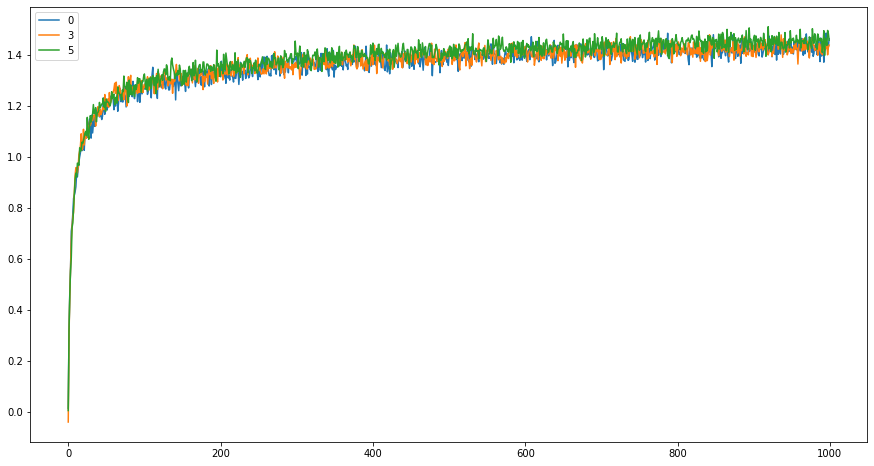

In [ ]:
env = SationaryMABEnv()

iter = 1000
expir = 2000
reward_averages_by_initial = []

for initials in [0, 3, 5]:
    reward_histories = np.zeros(iter)
    for exp_number in range(expir):
        env.reset()
        history = greedy_run_eps(env, eps=0, gamma=0.2, initial=initials)
        reward_histories = np.add(history,reward_histories )
    reward_averages_by_initial.append(reward_histories/expir)

#Plot average reward accross 2k experiments
plt.figure(figsize=(15,8))
for i, initials in enumerate([0, 3, 5]):
    plt.plot(reward_averages_by_initial[i], label=str(initials))
plt.legend()

Inference: when the initial value changes , there is no much change happening